In [1]:
import bt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']  # 设置字体为黑体

In [2]:
import pandas as pd
def get_data(symbol):
    data = pd.read_csv('data/{}.csv'.format(symbol))
    data['date'] = data['date'].apply(lambda x: str(x))
    data.set_index('date', inplace=True)
    data.sort_index(ascending=True, inplace=True)
    data.index = pd.to_datetime(data.index)
    return data

# df_1 = get_data('159597.SZ')
# df_2 = get_data('159525.SZ')

df_1 = get_data('000300.SH')
df_2 = get_data('159915.SZ')
df_1

,symbol,close,open,high,low,pre_close,change,pct_chg,volume,amount
date,,,,,,,,,,
2005-01-04,000300.SH,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
2005-01-05,000300.SH,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
2005-01-06,000300.SH,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
2005-01-07,000300.SH,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
2005-01-10,000300.SH,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...
2024-08-29,000300.SH,3277.6812,3273.5410,3290.7857,3269.5288,3286.4956,-8.8144,-0.2682,1.307023e+08,1.743401e+08
2024-08-30,000300.SH,3321.4323,3273.7532,3351.6254,3273.6496,3277.6812,43.7511,1.3348,1.886954e+08,2.683760e+08
2024-09-02,000300.SH,3265.0110,3307.5432,3307.7627,3264.7565,3321.4323,-56.4213,-1.6987,1.476124e+08,1.944100e+08


In [3]:
# 合并dataframe
df = pd.concat([df_1,df_2])
df

,symbol,close,open,high,low,pre_close,change,pct_chg,volume,amount
date,,,,,,,,,,
2005-01-04,000300.SH,982.794,994.769,994.769,980.658,1000.000,-17.206,-1.7206,7412868.94,4431977.418
2005-01-05,000300.SH,992.564,981.577,997.323,979.877,982.794,9.770,0.9941,7119108.98,4529208.214
2005-01-06,000300.SH,983.174,993.331,993.788,980.330,992.564,-9.390,-0.9460,6288029.05,3921015.420
2005-01-07,000300.SH,983.958,983.045,995.711,979.812,983.174,0.784,0.0797,7298694.09,4737469.399
2005-01-10,000300.SH,993.879,983.760,993.959,979.789,983.958,9.921,1.0083,5791697.99,3762932.890
...,...,...,...,...,...,...,...,...,...,...
2024-05-22,159915.SZ,1.820,1.819,1.825,1.816,NaN,NaN,NaN,763988.00,NaN
2024-05-23,159915.SZ,1.811,1.837,1.837,1.807,NaN,NaN,NaN,6599889.00,NaN
2024-05-24,159915.SZ,1.781,1.804,1.821,1.778,NaN,NaN,NaN,6828319.00,NaN


In [4]:
df_close = df.pivot_table(values='close', index=df.index, columns='symbol')
df_close.dropna(inplace=True)
df_close

symbol,000300.SH,159915.SZ
date,,
2011-12-09,2503.4610,0.797
2011-12-12,2477.6920,0.790
2011-12-13,2421.9280,0.768
2011-12-14,2397.4800,0.760
2011-12-15,2340.7880,0.752
...,...,...
2024-05-22,3684.4510,1.820
2024-05-23,3641.7917,1.811
2024-05-24,3601.4754,1.781


In [6]:
# 创建策略
s_benchermark_1 = bt.Strategy('基准-沪深300', [bt.algos.RunOnce(),
                       bt.algos.SelectThese(tickers=['159915.SZ']),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

import numpy as np
factor = df_close.pct_change(20)

signal = np.where(factor>0.02,1,np.nan)
signal = np.where(factor<-0.02,0,signal)
signal = pd.DataFrame(signal,df_close.index,columns=factor.columns)
signal = signal.ffill()
signal = signal.fillna(0)

class SelectTopK(bt.AlgoStack):
    def __init__(self, signal, K, sort_descending=True, all_or_none=False, filter_selected=True):
        super(SelectTopK, self).__init__(bt.algos.SetStat(signal),
                                         bt.algos.SelectN(K, sort_descending, all_or_none, filter_selected))

s= bt.Strategy('大小盘-趋势轮动', [               
                       bt.algos.RunDaily(),
                       bt.algos.SelectWhere(signal),
                       SelectTopK(factor,K=1),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])



stras = [s_benchermark_1,s]

# 创建回测
bkts = [bt.Backtest(s, df_close) for s in stras]
res = bt.run(*bkts)

100%|██████████| 2/2 [00:03<00:00,  1.82s/it]


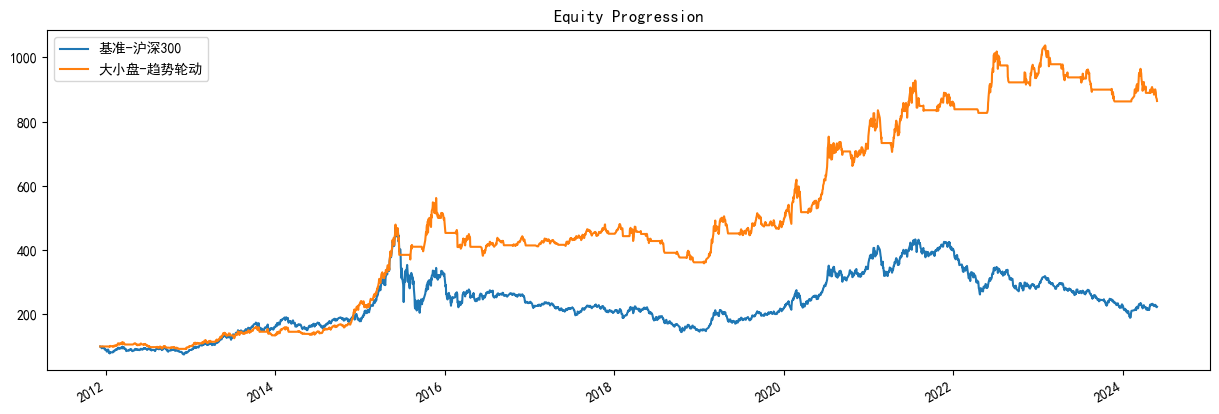

In [7]:
res.plot()
plt.show()

In [8]:
res.stats

,基准-沪深300,大小盘-趋势轮动
start,2011-12-08 00:00:00,2011-12-08 00:00:00
end,2024-05-28 00:00:00,2024-05-28 00:00:00
rf,0.0,0.0
total_return,1.238394,7.640747
cagr,0.066744,0.188773
max_drawdown,-0.695778,-0.361703
calmar,0.095927,0.5219
mtd,-0.017621,-0.028015
three_month,0.048795,-0.029484
six_month,-0.056085,0.001461
